In [7]:
# import library for data cleaning
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

from math import radians, sin, cos, sqrt, atan2
import string

# import liobrary for scaling
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# import models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# module to transfer file
import pickle


In [8]:
df= pd.read_csv("deliverytime.csv")          # fetch data

In [7]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [8]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


Steps:-

1. Data cleaning
2. EDA
3. Data Preprocessing
4. Model building
5. Evaluation / Testing
6. Improvement
7. Deployment

# Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [10]:
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
10155,218B,INDORES03DEL02,36,4.2,22.751857,75.866699,22.881857,75.996699,Drinks,scooter,42
8451,63D7,SURRES20DEL03,32,4.3,21.152760,72.778059,21.242760,72.868059,Meal,scooter,37
29081,2B5C,HYDRES11DEL01,31,5.0,17.430448,78.418213,17.500448,78.488213,Drinks,motorcycle,27
28848,B04F,RANCHIRES03DEL02,24,4.6,0.000000,0.000000,0.020000,0.020000,Meal,scooter,12
36413,1598,COIMBRES19DEL02,37,4.7,11.022298,76.998349,11.152298,77.128349,Snack,scooter,24


In [11]:
l = LabelEncoder() # encode the target

In [12]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [13]:
df.duplicated().sum()  #check the dublicate value

0

In [14]:
# df = df.drop_duplicates(keep='first')       NOT Required

In [15]:
# Handle missing values or anomalies ,Ex- replacing 0.000000 latitude/longitude with NaN
df['Restaurant_latitude'] = df['Restaurant_latitude'].replace(0.000000, pd.NA)
df['Restaurant_longitude'] = df['Restaurant_longitude'].replace(0.000000, pd.NA)

In [16]:
# Fill missing values or drop rows/columns as appropriate
df = df.dropna()  # Drop rows with NaN values, or use df.fillna(value)

In [17]:
# Remove duplicates if any
df = df.drop_duplicates()

In [18]:
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

  Restaurant_latitude Restaurant_longitude  Delivery_location_latitude  \
0           22.745049            75.892471                   22.765049   
1           12.913041            77.683237                   13.043041   
2           12.914264              77.6784                   12.924264   
3           11.003669            76.976494                   11.053669   
4           12.972793            80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                 

# EDA

In [19]:
df['Delivery_person_Age'].value_counts()

Delivery_person_Age
29    3739
35    2099
36    2083
30    2050
37    2047
24    2044
22    2029
38    2020
33    2014
32    2010
28    2004
34    1995
25    1988
26    1988
39    1978
27    1973
21    1965
20    1964
31    1943
23    1939
50      46
15      35
Name: count, dtype: int64

In [20]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           24396
scooter              14029
electric_scooter      3468
bicycle                 60
Name: count, dtype: int64

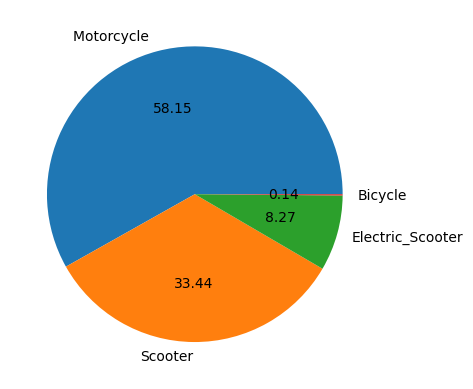

In [21]:
plt.pie(df['Type_of_vehicle'].value_counts(),autopct='%0.2f',labels=["Motorcycle ","Scooter","Electric_Scooter","Bicycle"])
plt.show()

In [22]:
df['Type_of_order'].value_counts()

Type_of_order
Snack      10616
Meal       10524
Drinks     10445
Buffet     10368
Name: count, dtype: int64

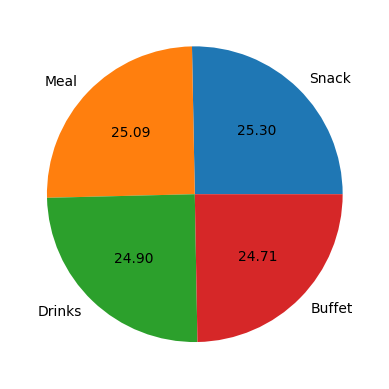

In [23]:
plt.pie(df['Type_of_order'].value_counts(),autopct='%0.2f',labels=["Snack","Meal","Drinks","Buffet"])
plt.show()

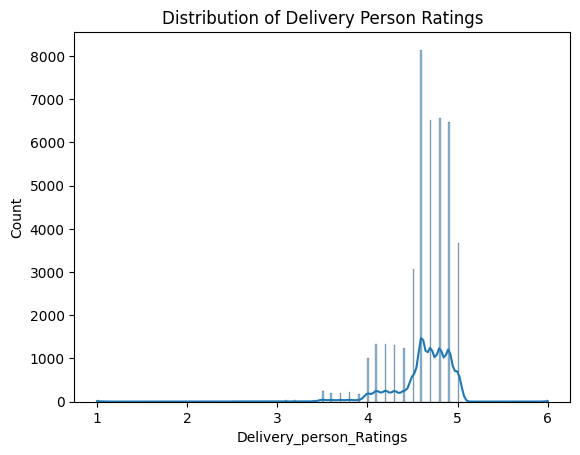

In [24]:
# Distribution of ratings
sns.histplot(df['Delivery_person_Ratings'], kde=True)
plt.title('Distribution of Delivery Person Ratings')
plt.show()

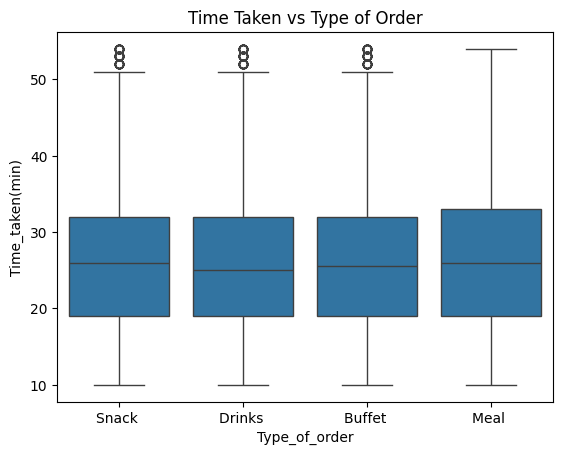

In [25]:
# Relationship between 'Time_taken' and 'Type_of_order'
sns.boxplot(data=df, x='Type_of_order', y='Time_taken(min)')
plt.title('Time Taken vs Type of Order')
plt.show()

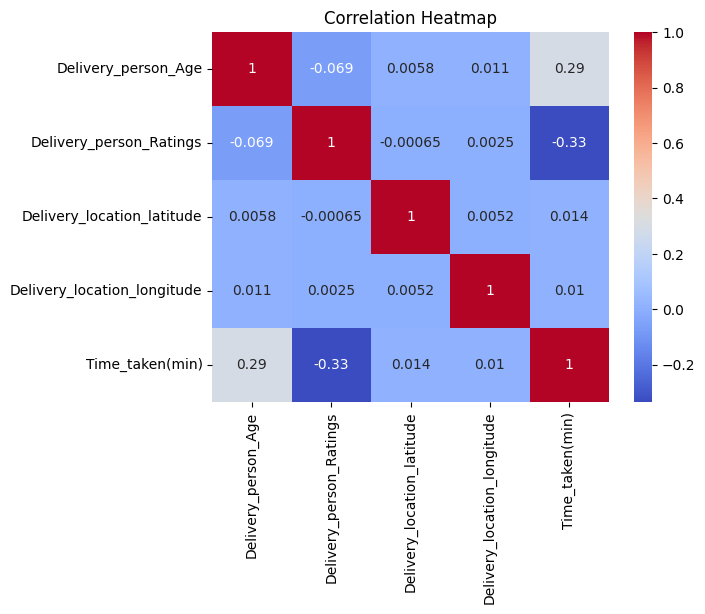

In [26]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data is Imblanced

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.6784,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [29]:
df.shape

(41953, 11)

In [30]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c


In [32]:
df['Delivery_Distance'] = df.apply(
    lambda row: haversine(
        row['Restaurant_latitude'], row['Restaurant_longitude'],
        row['Delivery_location_latitude'], row['Delivery_location_longitude']
    ),
    axis=1
)

# Preview the updated dataset
df[['Delivery_Distance', 'Time_taken(min)']].head()


,Delivery_Distance,Time_taken(min)
0,3.025149,24
1,20.183530,33
2,1.552758,26
3,7.790401,21
4,6.210138,30


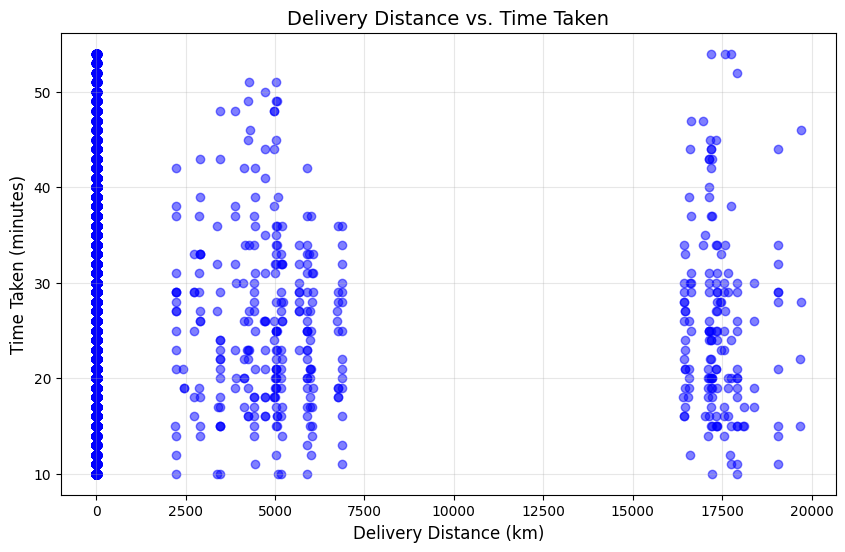

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Delivery_Distance'], df['Time_taken(min)'], alpha=0.5, c='blue')
plt.title('Delivery Distance vs. Time Taken', fontsize=14)
plt.xlabel('Delivery Distance (km)', fontsize=12)
plt.ylabel('Time Taken (minutes)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_7960\3102503943.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_distance = df.groupby('Distance_Range')['Time_taken(min)'].mean().reset_index()


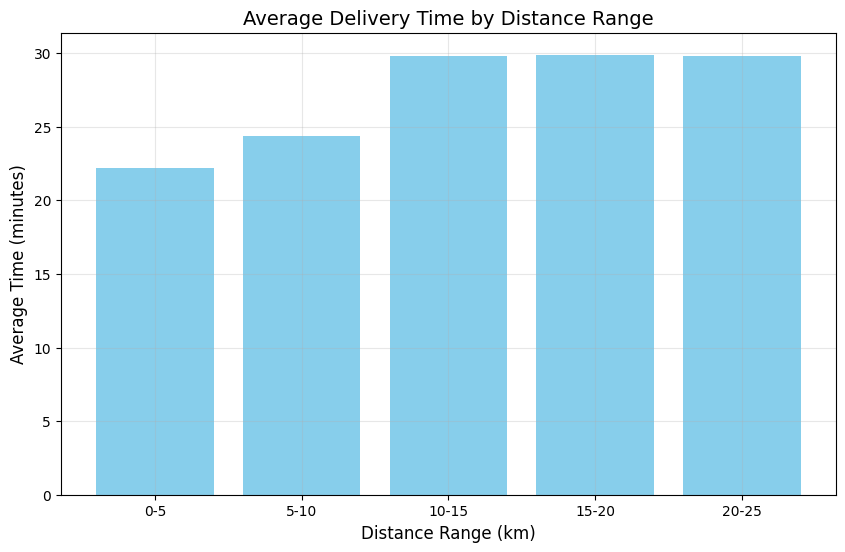

In [34]:
# Bin distances into ranges
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25']
df['Distance_Range'] = pd.cut(df['Delivery_Distance'], bins=bins, labels=labels)

# Calculate average time for each distance range
avg_time_by_distance = df.groupby('Distance_Range')['Time_taken(min)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(avg_time_by_distance['Distance_Range'], avg_time_by_distance['Time_taken(min)'], color='skyblue')
plt.title('Average Delivery Time by Distance Range', fontsize=14)
plt.xlabel('Distance Range (km)', fontsize=12)
plt.ylabel('Average Time (minutes)', fontsize=12)
plt.grid(alpha=0.3)

# Data Preprocessing

1.Lower case                                                                                               
2.Tokenization                                                                                                                
3.Removing special character                                                                                                 
4.Removing stop words and punctuation                                                                                        
5.Stemming                                                                                             

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
p = PorterStemmer()

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [85]:
# function to transform the text

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(p.stem(i))
        
    
   
            
    return " ".join(y)

In [88]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Delivery_Distance,Distance_Range
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149,0-5
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530,20-25
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.6784,12.924264,77.688400,Drinks,motorcycle,26,1.552758,0-5
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401,5-10
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138,5-10


In [86]:
# make word cloud
!pip install wordcloud

In [89]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [90]:
# Encoding categorical features
encoder = LabelEncoder()
df['Type_of_order'] = encoder.fit_transform(df['Type_of_order'])
df['Type_of_vehicle'] = encoder.fit_transform(df['Type_of_vehicle'])
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

  Restaurant_latitude Restaurant_longitude  Delivery_location_latitude  \
0           22.745049            75.892471                   22.765049   
1           12.913041            77.683237                   13.043041   
2           12.914264              77.6784                   12.924264   
3           11.003669            76.976494                   11.053669   
4           12.972793            80.249982                   13.012793   

   Delivery_location_longitude  Type_of_order  Type_of_vehicle  \
0                    75.912471  

# Model Building

In [9]:
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [ ]:
x.shape

In [15]:
y = df['Type_of_vehicle'].values

In [16]:
y

array(['motorcycle ', 'scooter ', 'motorcycle ', ..., 'scooter ',
       'motorcycle ', 'scooter '], dtype=object)

In [17]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the dataset does not contain missing values
# Replace NaN values in numeric columns with the mean
df.fillna(df.mean(), inplace=True)

# If there are categorical columns, encode them using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Time_taken(min)', axis=1)
y = df['Time_taken(min)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Note:-                                                                                                           
1. Since this dataset is imbalanced so precision score is more matter so we will go with multinomialNB as it's precision score is 1
2. And this come from when we choose tfidf

In [4]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc=  ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [5]:
clf = {
    'LR'  : lrc,
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'RFC' : rfc,
    'ABC' : abc,
    'BGC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
    
}

In [6]:
def train_classifier(clf,x_train,y_train):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precission = precision_score(y_test,y_pred)
    
    return accuracy,precission

In [22]:
acc_score = []
preci_score = []

def training(x_train,y_train):
    for i , val in clf.items():
        val.fit(x_train,y_train)
        y_pred = val.predict(x_test)
        acc_score.append(accuracy_score(y_test,y_pred))
        preci_score.append(precision_score(y_test,y_pred))

In [23]:
old_acc_score = acc_score[:]
old_preci_score = preci_score[:]

In [24]:
old_preci_score

[]

# Evaluation / Testing

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter tuning for Random Forest
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Deployment

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input data
    # Preprocess the input data
    input_data = preprocess_data(data)  # This function should preprocess the input similar to your training data
    prediction = model.predict(input_data)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

A. Performance Matrics
1. Which delivery person has the highest average rating?
2. Which delivery person takes the least average time to deliver?
3. Is there a relationship between age and delivery time?
4. What type of orders take longer delivery times?
5. How does delivery performance vary by type of vehicle?